<a href="https://colab.research.google.com/github/juanfranbrv/curso-langchain/blob/main/Graph%20simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install langgraph -qU

## Estado

En primer lugar, defina el Estado del grafo.

El esquema de Estado sirve como esquema de entrada para todos los Nodos y Aristas del grafo.


`TypedDict` es una clase que permite definir diccionarios con tipos específicos para sus claves. Es útil para proporcionar anotaciones de tipo más precisas para diccionarios en Python. `TypedDict` está disponible en la biblioteca estándar de Python a partir de la versión 3.8.

`TypedDict`pertenece al módulo `typing` en Python. Es un módulo de la biblioteca estándar que proporciona soporte para anotaciones de tipo (type hints). Estas anotaciones permiten especificar los tipos esperados de variables, argumentos de funciones, valores de retorno y estructuras de datos, lo que mejora la claridad del código y permite a herramientas como **mypy** realizar verificaciones estáticas de tipos.

- **`State`**: Es una clase que hereda de `TypedDict`. Esto significa que `State` define la estructura de un diccionario con claves y tipos de valores específicos.
    
- **`graph_state: str`**: Indica que el diccionario debe tener una clave llamada `graph_state`, y su valor debe ser de tipo `str` (cadena de texto).
    

En resumen, `State` es un diccionario tipado que debe tener la siguiente estructura:

```
{
    "graph_state": "algun_valor_de_tipo_str"
}
```



In [3]:
from typing import TypedDict

class State(TypedDict):
    graph_state: str

## Nodos

Los nodos no son más que funciones python.

El primer argumento posicional es el estado, como se ha definido anteriormente.

Dado que el estado es un TypedDict con el esquema definido anteriormente, cada nodo puede acceder a la clave, graph_state, con `state['graph_state']`.

Cada nodo devuelve un nuevo valor de la clave de estado graph_state.

Por defecto, el nuevo valor devuelto por cada nodo sobreescribirá el valor de estado anterior.



In [6]:
def nodo_1(state):
    print("---Nodo 1---")
    return {"graph_state": state['graph_state'] +" Soy "}   #Estamos actualizando el estado y devolviendolo

def nodo_2(state):
    print("---Nodo 2---")
    return {"graph_state": state['graph_state'] +" feliz!"}

def nodo_3(state):
    print("---Nodo 3---")
    return {"graph_state": state['graph_state'] +" triste!"}

## Aristas

In [ ]:
Las aristas conectan los nodos.

Las aristas normales se utilizan si desea ir siempre, por ejemplo, del nodo_1 al nodo_2.

Las aristas condicionales se utilizan si desea establecer una ruta opcional entre nodos.

Las aristas condicionales se implementan como funciones que devuelven el siguiente nodo a visitar según cierta lógica.

In [7]:
import random
from typing import Literal


# Esta funcion "decide" / devuelve nodo_2 o nodo_3 de forma aleatoria
def decide_mood(state) -> Literal["nodo_2", "nodo_3"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "nodo_2"

    # 50% of the time, we return Node 3
    return "nodo_3"

Ahora, construimos el gráfico a partir de los componentes definidos anteriormente.

La clase StateGraph es la clase de gráfico que podemos utilizar.

Primero, inicializamos un StateGraph con la clase State que definimos anteriormente.

Luego, agregamos nuestros nodos y aristas.

Usamos el nodo START, un nodo especial que envía la entrada del usuario al gráfico, para indicar dónde comenzar nuestro gráfico.

El nodo END es un nodo especial que representa un nodo terminal.

Por último, compilamos nuestro gráfico para realizar algunas comprobaciones básicas en la estructura del gráfico.

Podemos visualizar el gráfico mermaid.

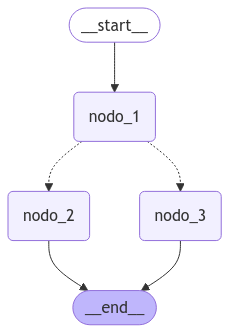

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("nodo_1", nodo_1)
builder.add_node("nodo_2", nodo_2)
builder.add_node("nodo_3", nodo_3)

# Logic
builder.add_edge(START, "nodo_1")
builder.add_conditional_edges("nodo_1", decide_mood)
builder.add_edge("nodo_2", END)
builder.add_edge("nodo_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

## Invocacion del grafo

El gráfico compilado implementa el protocolo Runnable.

Esto proporciona una forma estándar de ejecutar componentes LangChain.

La invocación es uno de los métodos estándar en esta interfaz.

La entrada es un diccionario {"graph_state": "Hola, soy lance."}, que establece el valor inicial para nuestro diccionario de estado del gráfico.

Cuando se llama a la invocación, el gráfico comienza la ejecución desde el nodo START.

Avanza a través de los nodos definidos (nodo_1, nodo_2, nodo_3) en orden.

La arista condicional atravesará desde el nodo 1 al nodo 2 o 3 utilizando una regla de decisión 50/50.

Cada función de nodo recibe el estado actual y devuelve un nuevo valor, que anula el estado del gráfico.

La ejecución continúa hasta que llega al nodo END.

In [13]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Nodo 1---
---Nodo 2---


{'graph_state': 'Hi, this is Lance. Soy  feliz!'}

Reto

Crear un grafo de este tipo y ejecutarlo
Debe tener 8 nodos (donde los nodos 2 y 3 presentan senda opciones) y todos teminan en END

